# Cryptocurrencies

# Goal 1: Retrieve 1 cryptocurrency via API

In [1]:
import requests
import pandas as pd

In [2]:
base = "https://api.coingecko.com/api/v3/"
url = base + "coins/list"

In [3]:
result = requests.get(url)

In [4]:
result.text[:100]

'[{"id":"bitcoin","symbol":"btc","name":"Bitcoin"},{"id":"litecoin","symbol":"ltc","name":"Litecoin"}'

In [5]:
j = result.json()

In [6]:
df = pd.DataFrame(j)

In [7]:
df.head(2)

,id,name,symbol
0,bitcoin,Bitcoin,btc
1,litecoin,Litecoin,ltc


In [8]:
base = "http://api.coingecko.com/api/v3/coins/"
coin = "bitcoin"
url = base + coin + "/market_chart?vs_currency=usd&days=300"

In [9]:
result = requests.get(url)

In [10]:
result

<Response [200]>

In [11]:
j = result.json()

In [12]:
j

{'prices': [[1514073600000, 14451.1145466743],
  [1514160000000, 14302.7537081839],
  [1514246400000, 16616.6820570844],
  [1514332800000, 16373.0810795739],
  [1514419200000, 15067.8994980567],
  [1514505600000, 15096.5594360709],
  [1514592000000, 13620.3618741461],
  [1514678400000, 14839.5907854184],
  [1514764800000, 14093.6068305274],
  [1514851200000, 15321.9328517642],
  [1514937600000, 15583.8855377593],
  [1515024000000, 15976.365194174],
  [1515110400000, 18336.9229801691],
  [1515196800000, 18343.6624934071],
  [1515283200000, 17039.8739138488],
  [1515369600000, 15900.3650216006],
  [1515456000000, 15604.7234082405],
  [1515542400000, 15509.2701268168],
  [1515628800000, 14050.5696063543],
  [1515715200000, 14759.294629915],
  [1515801600000, 15193.3148979847],
  [1515888000000, 14476.5889713691],
  [1515974400000, 14411.9977069182],
  [1516060800000, 11723.9135206658],
  [1516147200000, 11415.3928442768],
  [1516233600000, 11569.4249920858],
  [1516320000000, 11758.469332

### data presented as a dictionary

In [13]:
j.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [14]:
j_df = pd.DataFrame(j['prices'], columns = ['date','price'])

In [15]:
j_df.head()

,date,price
0,1514073600000,14451.114547
1,1514160000000,14302.753708
2,1514246400000,16616.682057
3,1514332800000,16373.081080
4,1514419200000,15067.899498


In [16]:
# convert to date time formatting
j_df['date'] = pd.to_datetime(j_df['date'],unit = 'ms').dt.round('1min')

In [17]:
import matplotlib.pyplot as plt

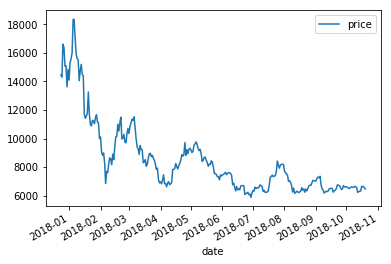

In [18]:
j_df.plot('date','price')
plt.show()

In [19]:
a = j_df.head(10)

In [20]:
# now you have a y for sklearn

In [21]:
# create a seperate column for x

In [22]:
#shifts a down by 1 replace by NaN
a['x-1'] = a['price'].shift(1)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
a['x-2'] = a['price'].shift(2)
a['x-3'] = a['price'].shift(3)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
a.head(20)

,date,price,x-1,x-2,x-3
0,2017-12-24,14451.114547,NaN,NaN,NaN
1,2017-12-25,14302.753708,14451.114547,NaN,NaN
2,2017-12-26,16616.682057,14302.753708,14451.114547,NaN
3,2017-12-27,16373.081080,16616.682057,14302.753708,14451.114547
4,2017-12-28,15067.899498,16373.081080,16616.682057,14302.753708
5,2017-12-29,15096.559436,15067.899498,16373.081080,16616.682057
6,2017-12-30,13620.361874,15096.559436,15067.899498,16373.081080
7,2017-12-31,14839.590785,13620.361874,15096.559436,15067.899498
8,2018-01-01,14093.606831,14839.590785,13620.361874,15096.559436
9,2018-01-02,15321.932852,14093.606831,14839.590785,13620.361874


In [25]:
#target value is now associated with period 1, 2, 3 before

In [26]:
a.dropna(inplace=True)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Simple linear regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
X = a[['x-1','x-2','x-3']]
X

,x-1,x-2,x-3
3,16616.682057,14302.753708,14451.114547
4,16373.081080,16616.682057,14302.753708
5,15067.899498,16373.081080,16616.682057
6,15096.559436,15067.899498,16373.081080
7,13620.361874,15096.559436,15067.899498
8,14839.590785,13620.361874,15096.559436
9,14093.606831,14839.590785,13620.361874


In [29]:
m = LinearRegression()

In [30]:
y = a['price']
y

3    16373.081080
4    15067.899498
5    15096.559436
6    13620.361874
7    14839.590785
8    14093.606831
9    15321.932852
Name: price, dtype: float64

In [31]:
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
m.score(X,y)

0.4221008316865771

In [33]:
ypred = m.predict(X)

In [34]:
a['ypred'] = pd.DataFrame(ypred)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


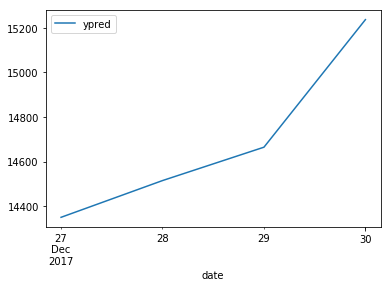

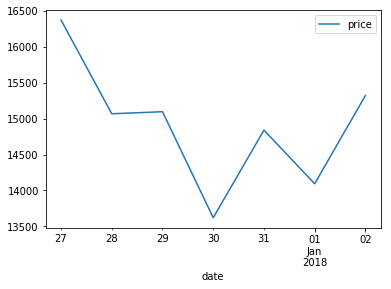

In [35]:
a.plot('date','ypred')
a.plot('date','price')
plt.show()

# Goal 2: Plot an autocorrelation

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

In [37]:
j_df.head(2)

,date,price
0,2017-12-24,14451.114547
1,2017-12-25,14302.753708


In [38]:
j_df.set_index(['date'],inplace=True)

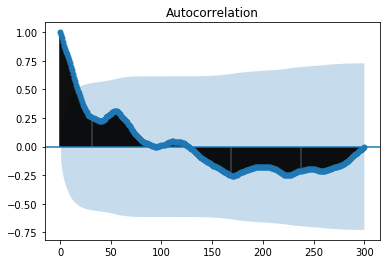

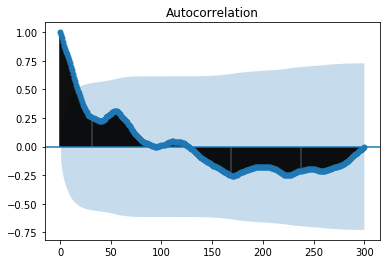

In [39]:
plot_acf(j_df,  alpha=.05, use_vlines=True)
# Confidence intervals are drawn as a cone.
#By default set to a 95% confidence interval, suggesting that correlation values outside cone are very likely a correlation and not a statistical fluke

In [40]:
b= round(j_df['price'],2)
import matplotlib.pyplot as plot

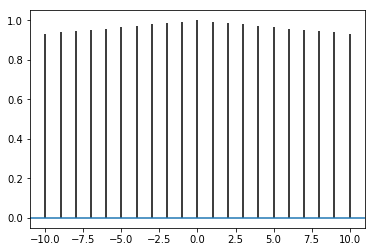

In [41]:
plot.acorr(b)
plt.show()

# Make a list of 10 coins

In [42]:
url_list = "https://api.coingecko.com/api/v3/coins/list"
coin_list = requests.get(url_list)
coin_list = coin_list.json()

In [43]:
coin_list = pd.DataFrame(coin_list)

In [44]:
coins = coin_list['id'][1:11]

In [45]:
coins

1         litecoin
2       auroracoin
3         peercoin
4         dogecoin
5              nxt
6             omni
7         namecoin
8     counterparty
9            quark
10     feathercoin
Name: id, dtype: object

# Automate my import

In [46]:
for i in coins:
    print(i)

litecoin
auroracoin
peercoin
dogecoin
nxt
omni
namecoin
counterparty
quark
feathercoin


In [47]:
data_list = []

for i in coins:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

In [48]:
data_list

[              date       price file_name
 0    1514073600000  278.464135  litecoin
 1    1514160000000  270.867366  litecoin
 2    1514246400000  294.990835  litecoin
 3    1514332800000  271.537978  litecoin
 4    1514419200000  254.039085  litecoin
 5    1514505600000  248.070088  litecoin
 6    1514592000000  223.400325  litecoin
 7    1514678400000  237.571416  litecoin
 8    1514764800000  230.462120  litecoin
 9    1514851200000  255.048185  litecoin
 10   1514937600000  248.042194  litecoin
 11   1515024000000  244.834372  litecoin
 12   1515110400000  254.138525  litecoin
 13   1515196800000  289.930033  litecoin
 14   1515283200000  278.975982  litecoin
 15   1515369600000  263.746383  litecoin
 16   1515456000000  258.719965  litecoin
 17   1515542400000  253.792171  litecoin
 18   1515628800000  233.343347  litecoin
 19   1515715200000  246.191886  litecoin
 20   1515801600000  268.368115  litecoin
 21   1515888000000  247.801155  litecoin
 22   1515974400000  241.151806  l

In [49]:
data_df = pd.concat(data_list)

In [50]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3010 entries, 0 to 300
Data columns (total 3 columns):
date         3010 non-null int64
price        3010 non-null float64
file_name    3010 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 94.1+ KB


In [51]:
data_df['date'] = pd.to_datetime(data_df['date'],unit = 'ms').dt.round('1min')

In [52]:
data_df.rename(columns={'file_name': 'coin'},inplace=True)

In [53]:
data_df.set_index(['coin'])

,date,price
coin,,
litecoin,2017-12-24 00:00:00,278.464135
litecoin,2017-12-25 00:00:00,270.867366
litecoin,2017-12-26 00:00:00,294.990835
litecoin,2017-12-27 00:00:00,271.537978
litecoin,2017-12-28 00:00:00,254.039085
litecoin,2017-12-29 00:00:00,248.070088
litecoin,2017-12-30 00:00:00,223.400325
litecoin,2017-12-31 00:00:00,237.571416
litecoin,2018-01-01 00:00:00,230.462120


In [54]:
coins

1         litecoin
2       auroracoin
3         peercoin
4         dogecoin
5              nxt
6             omni
7         namecoin
8     counterparty
9            quark
10     feathercoin
Name: id, dtype: object

# Goal 1: Retrieve 10 cryptocurrency timelines

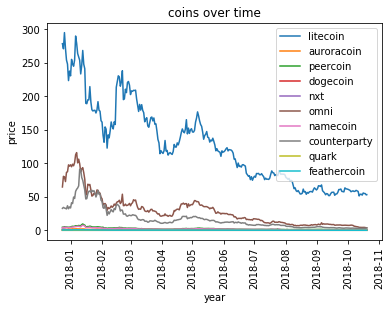

In [55]:
import matplotlib.pyplot as plt
for i in coins:
    individual = data_df[data_df.coin == i]
    plt.plot(individual['date'], individual['price'], label = i)
    plt.legend()
    plt.title('coins over time')
    plt.ylabel('price')
    plt.xlabel('year')
    plt.xticks(rotation='vertical')

In [56]:
from numpy import convolve

In [57]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

# Goal 2: Plot a rolling average

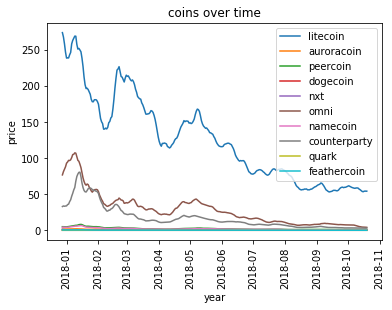

In [58]:
import matplotlib.pyplot as plt
import numpy as np

for i in coins:
    individual = data_df[data_df.coin == i]
    yMA = movingaverage(individual['price'],5)
    plt.plot(individual['date'][len(individual['date'])-len(yMA):], yMA, label = i)
    plt.legend()
    plt.title('coins over time')
    plt.ylabel('price')
    plt.xlabel('year')
    plt.xticks(rotation='vertical')

# Goal 1: Use Quandl to retrieve other financial data

In [59]:
base = "https://api.coingecko.com/api/v3/coins/"
url = base + "omni/market_chart?vs_currency=usd&days=1825"
result = requests.get(url)

In [60]:
j = result.json()

In [61]:
df = pd.DataFrame(j['prices'], columns = ['date','price'])


In [62]:
df['date'] = pd.to_datetime(df['date'],unit = 'ms').dt.round('1min')

In [63]:
df.sort_values(by='date')

,date,price
0,2013-12-24 00:00:00,107.076000
1,2013-12-25 00:00:00,133.573000
2,2013-12-26 00:00:00,187.578000
3,2013-12-27 00:00:00,181.320000
4,2013-12-29 00:00:00,170.155000
5,2013-12-30 00:00:00,173.165000
6,2013-12-31 00:00:00,187.130000
7,2014-01-01 00:00:00,175.734000
8,2014-01-02 00:00:00,156.612000
9,2014-01-03 00:00:00,143.741000


In [66]:
cd ..

/Users/glynismattheisen/Desktop


In [67]:
JP_Morgan = pd.read_csv('EOD-JPM.csv')

In [68]:
import plotly.plotly as py
import plotly.graph_objs as go

In [69]:
import pandas_datareader as web
import plotly
plotly.tools.set_credentials_file(username='gmattheisen', api_key='dwBWwrEaic7U3SHHZNyl')

In [70]:
JP_Morgan.head(3)

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2018-10-12,110.37,110.83,105.60,106.95,32026620.0,0.0,1.0,110.37,110.83,105.60,106.95,32026620.0
1,2018-10-11,110.97,111.47,107.38,108.13,33705616.0,0.0,1.0,110.97,111.47,107.38,108.13,33705616.0
2,2018-10-10,114.70,114.95,111.47,111.47,23085079.0,0.0,1.0,114.70,114.95,111.47,111.47,23085079.0


In [71]:
trace = go.Candlestick(x=JP_Morgan.Date,
                       open=JP_Morgan.Open,
                       high=JP_Morgan.High,
                       low=JP_Morgan.Low,
                       close=JP_Morgan.Close)

In [72]:
data = [trace]

# Create a candlestick plot

In [73]:
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gmattheisen/0 or inside your plot.ly account where it is named 'simple_candlestick'


In [74]:
data_df.head(6)

,date,price,coin
0,2017-12-24,278.464135,litecoin
1,2017-12-25,270.867366,litecoin
2,2017-12-26,294.990835,litecoin
3,2017-12-27,271.537978,litecoin
4,2017-12-28,254.039085,litecoin
5,2017-12-29,248.070088,litecoin


In [75]:
feathercoin = data_df[data_df.coin == 'feathercoin']

In [76]:
del feathercoin['coin']
feathercoin.head(5)

,date,price
0,2017-12-24,0.368448
1,2017-12-25,0.432913
2,2017-12-26,0.432138
3,2017-12-27,0.462836
4,2017-12-28,0.444848


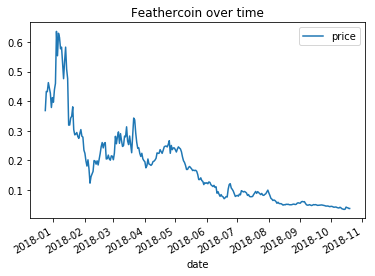

In [77]:
feathercoin.plot('date','price')
plt.title('Feathercoin over time')
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
LinReg = LinearRegression()

In [80]:
import datetime as dt
feathercoin['date']=feathercoin['date'].map(dt.datetime.toordinal)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [81]:
feathercoin.head(5)

,date,price
0,736687,0.368448
1,736688,0.432913
2,736689,0.432138
3,736690,0.462836
4,736691,0.444848


In [82]:
import numpy as np
x = feathercoin['date']
X = np.array(x)
X = X.reshape(-1,1)

In [83]:
y = feathercoin['price']
y = np.array(y)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 1), (76, 1), (225,), (76,))

In [98]:
LinReg.fit(X_train,y_train)
print('Train score: ' + str(LinReg.score(X_train,y_train)))
print('Test score: ' + str(LinReg.score(X_test,y_test)))

Train score: 0.7414940202254761
Test score: 0.795033861886727


In [95]:
ypred = LinReg.predict(X_test)

In [88]:
x_g = feathercoin['date']
y_g= feathercoin['price']

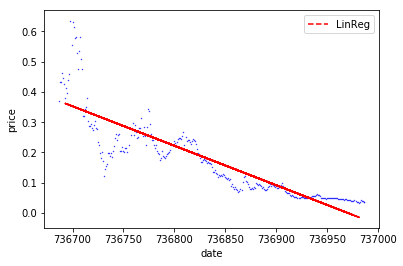

In [293]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.legend(['LinReg'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Polynomials

In [165]:
from sklearn.preprocessing import PolynomialFeatures

In [166]:
PolyReg = PolynomialFeatures(degree = 4)

In [167]:
Xpoly = PolyReg.fit_transform(X_train)

In [168]:
PolyReg.fit(Xpoly, y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [169]:
LinReg2 = LinearRegression()
LinReg2.fit(Xpoly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
LinReg2.score(Xpoly,y_train)

0.791737510950118

In [171]:
ypred_poly = LinReg2.predict(PolyReg.fit_transform(X_test))

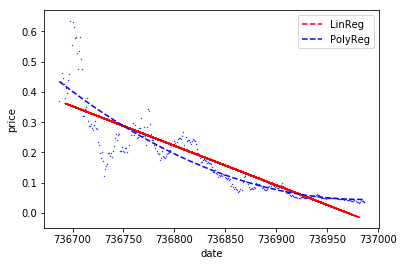

In [292]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.legend(['LinReg','PolyReg'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Lasso (L1)

In [173]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [174]:
scaler = MinMaxScaler()

In [175]:
scaled_x = scaler.fit_transform(Xpoly)

In [234]:
Lasso_fit = Lasso(alpha = 0.001).fit(scaled_x,y_train)

In [235]:
Lasso_fit.score(scaled_x,y_train)

0.7407933850811027

In [236]:
ypred_poly_lasso = Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X_test)))

In [237]:
#ypred_Lasso = Lasso_fit.predict(scaled_x)

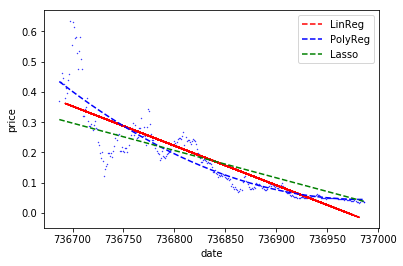

In [291]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.plot(X, Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'g--')
plt.legend(['LinReg','PolyReg','Lasso'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Ridge (L2)

In [249]:
Rid_fit = Ridge(alpha = 0.0000001).fit(scaled_x,y_train)

In [250]:
Rid_fit.score(scaled_x,y_train)

0.7879100263500727

In [251]:
ypred_Rid = Rid_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X_test)))

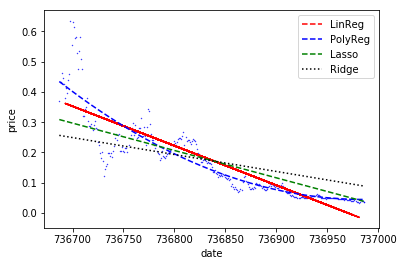

In [285]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.plot(X, Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'g--')
plt.plot(X,Rid_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'k:')
plt.legend(['LinReg','PolyReg','Lasso','Ridge'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Param Alpha

In [255]:
coeff = []
param = np.linspace(0.0000001,100,20)

for i in np.linspace(0.0000001,100,20):
    Rid_fit = Ridge(alpha = i).fit(scaled_x,y_train)
    coeff.append(Rid_fit.score(scaled_x,y_train))
    i += 1

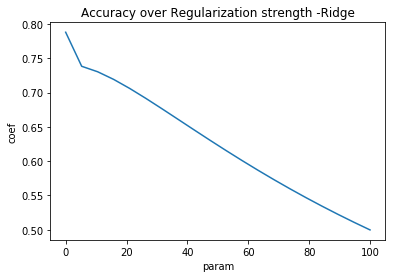

In [256]:
plt.plot(param,coeff)
plt.ylabel('coef')
plt.title('Accuracy over Regularization strength -Ridge')
plt.xlabel('param')
plt.show()

In [257]:
coeff2 = []
param2 = np.linspace(0.0000000001,0.01,10)

for i in np.linspace(0.0000000001,0.01,10):
    Lasso_fit = Lasso(alpha = i).fit(scaled_x,y_train)
    coeff2.append(Lasso_fit.score(scaled_x,y_train))
    i += 1


/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



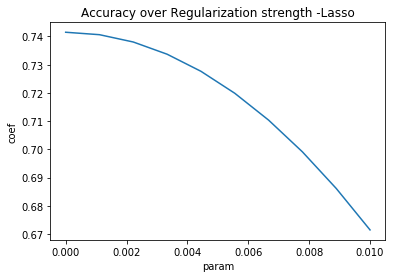

In [258]:
plt.plot(param2,coeff2)
plt.ylabel('coef')
plt.title('Accuracy over Regularization strength -Lasso')
plt.xlabel('param')
plt.show()

# Prophet

In [260]:
from fbprophet import Prophet

In [261]:
feathercoin_new = data_df[data_df.coin == 'feathercoin']

In [262]:
feathercoin_new.head(5)

,date,price,coin
0,2017-12-24,0.368448,feathercoin
1,2017-12-25,0.432913,feathercoin
2,2017-12-26,0.432138,feathercoin
3,2017-12-27,0.462836,feathercoin
4,2017-12-28,0.444848,feathercoin


In [263]:
del feathercoin_new['coin']

In [264]:
feathercoin_new=feathercoin_new.rename(columns={'date':'ds', 'price':'y'})

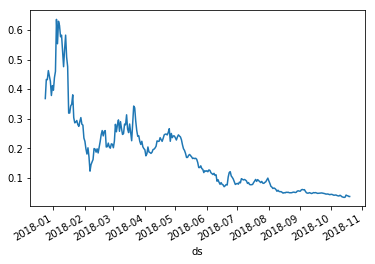

In [265]:
feathercoin_new.set_index('ds').y.plot()

In [266]:
model = Prophet(weekly_seasonality=True)
model.fit(feathercoin_new)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [267]:
future = model.make_future_dataframe(periods=24,freq='W')
future.tail()

,ds
320,2019-03-03 12:38:00
321,2019-03-10 12:38:00
322,2019-03-17 12:38:00
323,2019-03-24 12:38:00
324,2019-03-31 12:38:00


In [268]:
forecast = model.predict(future)

In [269]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
320,2019-03-03 12:38:00,-0.072395,-0.155948,0.010667
321,2019-03-10 12:38:00,-0.077682,-0.160500,0.008353
322,2019-03-17 12:38:00,-0.082969,-0.168636,0.006930
323,2019-03-24 12:38:00,-0.088257,-0.178567,-0.000308
324,2019-03-31 12:38:00,-0.093544,-0.189159,-0.004793


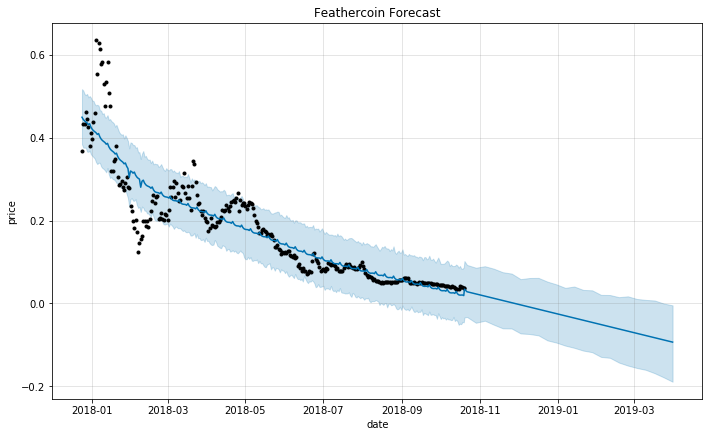

In [270]:
model.plot(forecast)
plt.title('Feathercoin Forecast')
plt.ylabel('price')
plt.xlabel('date');

# Bitcoin

In [294]:
bitcoin = j_df.copy()

In [295]:
bitcoin.head(5)

,price
date,
2017-12-24,14451.114547
2017-12-25,14302.753708
2017-12-26,16616.682057
2017-12-27,16373.081080
2017-12-28,15067.899498


In [299]:
bitcoin.reset_index(inplace=True)

In [300]:
bitcoin['date']=bitcoin['date'].map(dt.datetime.toordinal)

In [301]:
x = bitcoin['date']
X = np.array(x)
X = X.reshape(-1,1)

In [302]:
y = bitcoin['price']
y = np.array(y)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [304]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 1), (76, 1), (225,), (76,))

In [305]:
LinReg.fit(X_train,y_train)
print('Train score: ' + str(LinReg.score(X_train,y_train)))
print('Test score: ' + str(LinReg.score(X_test,y_test)))

Train score: 0.6053229919088112
Test score: 0.5986986180307444


In [306]:
ypred = LinReg.predict(X_test)

In [308]:
x_g = bitcoin['date']
y_g= bitcoin['price']

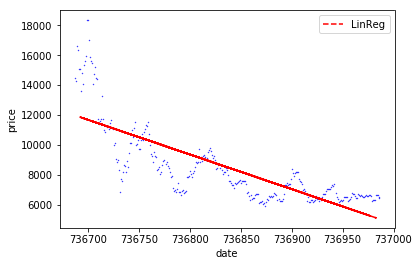

In [309]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.legend(['LinReg'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Polynomials

In [310]:
PolyReg = PolynomialFeatures(degree = 4)

In [311]:
Xpoly = PolyReg.fit_transform(X_train)

In [312]:
PolyReg.fit(Xpoly, y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [313]:
LinReg2 = LinearRegression()
LinReg2.fit(Xpoly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [314]:
LinReg2.score(Xpoly,y_train)

0.7592637346762484

In [315]:
ypred_poly = LinReg2.predict(PolyReg.fit_transform(X_test))

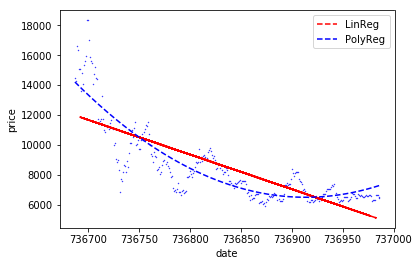

In [316]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.legend(['LinReg','PolyReg'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Lasso (L1)

In [318]:
scaler = MinMaxScaler()

In [319]:
scaled_x = scaler.fit_transform(Xpoly)

In [320]:
Lasso_fit = Lasso(alpha = 0.001).fit(scaled_x,y_train)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [321]:
Lasso_fit.score(scaled_x,y_train)

0.6053280366805436

In [323]:
ypred_poly_lasso = Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X_test)))

In [324]:
#ypred_Lasso = Lasso_fit.predict(scaled_x)

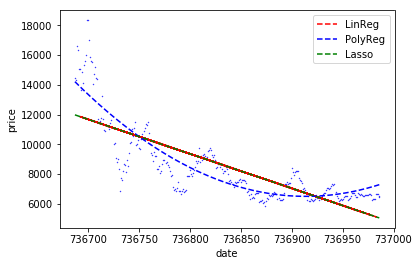

In [325]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.plot(X, Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'g--')
plt.legend(['LinReg','PolyReg','Lasso'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Ridge (L2)

In [326]:
Rid_fit = Ridge(alpha = 0.0000001).fit(scaled_x,y_train)

In [327]:
Rid_fit.score(scaled_x,y_train)

0.7475435813562512

In [328]:
ypred_Rid = Rid_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X_test)))

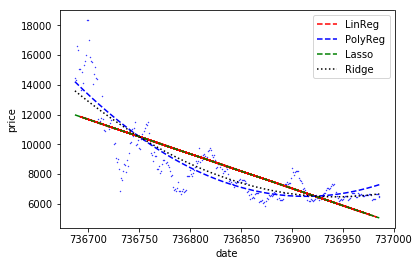

In [329]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.plot(X, Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'g--')
plt.plot(X,Rid_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'k:')
plt.legend(['LinReg','PolyReg','Lasso','Ridge'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# More detailed prediction

In [330]:
bitcoin = j_df.copy()
bitcoin.head(2)

,price
date,
2017-12-24,14451.114547
2017-12-25,14302.753708


In [331]:
bitcoin.reset_index(inplace=True)
bitcoin['date']=bitcoin['date'].map(dt.datetime.toordinal)
bitcoin.head(3)

,date,price
0,736687,14451.114547
1,736688,14302.753708
2,736689,16616.682057


In [332]:
bitcoin['p-mean'] = bitcoin['price'].rolling(10).mean()

In [333]:
bitcoin = bitcoin.dropna()

In [334]:
x = bitcoin['date']
X = np.array(x)
X = X.reshape(-1,1)

In [337]:
y = bitcoin['p-mean']
y = np.array(y)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [341]:
LinReg= LinearRegression()
LinReg.fit(X_train,y_train)
print('Train score: ' + str(LinReg.score(X_train,y_train)))
print('Test score: ' + str(LinReg.score(X_test,y_test)))

Train score: 0.6159119004924225
Test score: 0.6360428289305602


In [342]:
ypred = LinReg.predict(X_test)

In [343]:
x_g = bitcoin['date']
y_g= bitcoin['price']

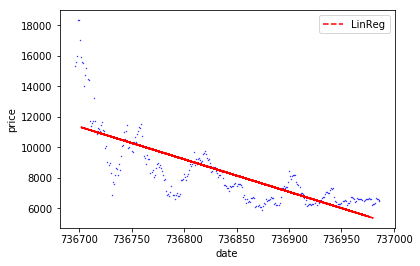

In [344]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.legend(['LinReg'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Polynomial

In [362]:
PolyReg = PolynomialFeatures(degree =10)

In [363]:
Xpoly = PolyReg.fit_transform(X_train)

In [364]:
PolyReg.fit(Xpoly, y_train)

PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)

In [365]:
LinReg2 = LinearRegression()
LinReg2.fit(Xpoly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [366]:
LinReg2.score(Xpoly,y_train)

0.7700948348838053

In [367]:
ypred_poly = LinReg2.predict(PolyReg.fit_transform(X_test))

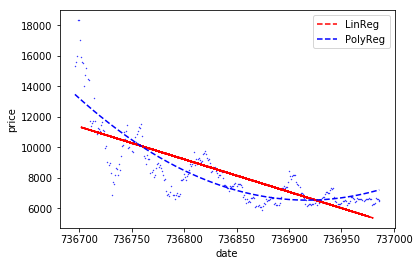

In [368]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.legend(['LinReg','PolyReg'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Lasso

In [369]:
scaler = MinMaxScaler()

In [370]:
scaled_x = scaler.fit_transform(Xpoly)

In [371]:
Lasso_fit = Lasso(alpha = 0.001).fit(scaled_x,y_train)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [372]:
Lasso_fit.score(scaled_x,y_train)

0.6159481346914348

In [373]:
ypred_poly_lasso = Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X_test)))

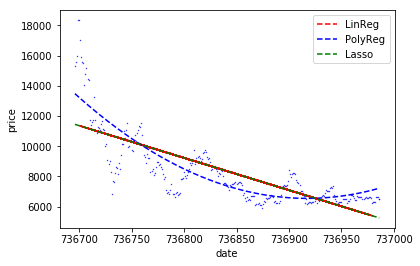

In [374]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.plot(X, Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'g--')
plt.legend(['LinReg','PolyReg','Lasso'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Ridge

In [375]:
Rid_fit = Ridge(alpha = 0.0000001).fit(scaled_x,y_train)

In [376]:
Rid_fit.score(scaled_x,y_train)

0.7700461855700556

In [377]:
ypred_Rid = Rid_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X_test)))

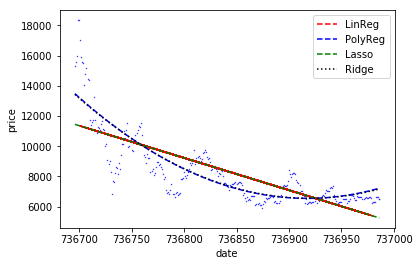

In [378]:
plt.scatter(x_g,y_g,color = 'b',s = 0.15)
plt.plot(X_test,ypred, 'r--')
plt.plot(X,LinReg2.predict(PolyReg.fit_transform(X)),'b--')
plt.plot(X, Lasso_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'g--')
plt.plot(X,Rid_fit.predict(scaler.fit_transform(PolyReg.fit_transform(X))),'k:')
plt.legend(['LinReg','PolyReg','Lasso','Ridge'])
plt.ylabel('price')
plt.xlabel('date')
plt.show()

# Prophet

In [417]:
bitcoin = j_df.copy()

In [418]:
bitcoin.reset_index(inplace=True)
bitcoin.head(3)

,date,price
0,2017-12-24,14451.114547
1,2017-12-25,14302.753708
2,2017-12-26,16616.682057


In [419]:
bitcoin['date'] = pd.to_datetime(bitcoin['date'])

In [420]:
bitcoin.head(3)

,date,price
0,2017-12-24,14451.114547
1,2017-12-25,14302.753708
2,2017-12-26,16616.682057


In [425]:
bitcoin_new=bitcoin.rename(columns={'date':'ds', 'price':'y'})

In [426]:
bitcoin_new.head(3)

,ds,y
0,2017-12-24,14451.114547
1,2017-12-25,14302.753708
2,2017-12-26,16616.682057


In [427]:
model = Prophet(weekly_seasonality=True)
model.fit(bitcoin_new)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [428]:
future = model.make_future_dataframe(periods=24,freq='W')
future.tail()

,ds
320,2019-03-03 12:38:00
321,2019-03-10 12:38:00
322,2019-03-17 12:38:00
323,2019-03-24 12:38:00
324,2019-03-31 12:38:00


In [429]:
forecast = model.predict(future)

In [430]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
320,2019-03-03 12:38:00,5597.693624,3329.942057,8148.855932
321,2019-03-10 12:38:00,5556.018506,3133.094581,8083.261315
322,2019-03-17 12:38:00,5514.343388,2921.285961,8307.400943
323,2019-03-24 12:38:00,5472.668270,2771.891073,8266.410172
324,2019-03-31 12:38:00,5430.993152,2586.083391,8541.429205


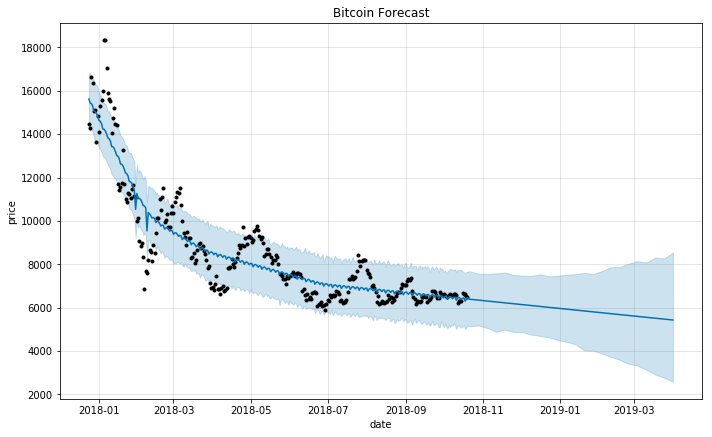

In [432]:
model.plot(forecast)
plt.title('Bitcoin Forecast')
plt.ylabel('price')
plt.xlabel('date');

# MORE

In [450]:
bitcoin = j_df.copy()
bitcoin.head(2)

,price
date,
2017-12-24,14451.114547
2017-12-25,14302.753708


In [451]:
bitcoin.reset_index(inplace=True)

In [454]:
bitcoin['p-mean'] = bitcoin['price'].rolling(10).mean()

bitcoin = bitcoin.dropna()

In [455]:
bitcoin.head(4)

,date,price,p-mean
9,2018-01-02,15321.932852,14978.358267
10,2018-01-03,15583.885538,15091.635366
11,2018-01-04,15976.365194,15258.996514
12,2018-01-05,18336.922980,15431.020607


In [456]:
del bitcoin['price']

In [457]:
bitcoin_new=bitcoin.rename(columns={'date':'ds', 'p-mean':'y'})

In [458]:
bitcoin_new.head(3)

,ds,y
9,2018-01-02,14978.358267
10,2018-01-03,15091.635366
11,2018-01-04,15258.996514


In [459]:
model = Prophet(weekly_seasonality=True)
model.fit(bitcoin_new)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [460]:
future = model.make_future_dataframe(periods=24,freq='W')
future.tail()

,ds
311,2019-03-03 12:38:00
312,2019-03-10 12:38:00
313,2019-03-17 12:38:00
314,2019-03-24 12:38:00
315,2019-03-31 12:38:00


In [461]:
forecast = model.predict(future)

In [462]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
311,2019-03-03 12:38:00,5705.349030,3023.739905,8469.358996
312,2019-03-10 12:38:00,5664.944147,2886.123219,8814.928731
313,2019-03-17 12:38:00,5624.539263,2551.980826,8741.598111
314,2019-03-24 12:38:00,5584.134380,2304.088981,8899.859573
315,2019-03-31 12:38:00,5543.729497,2231.758689,9167.195292


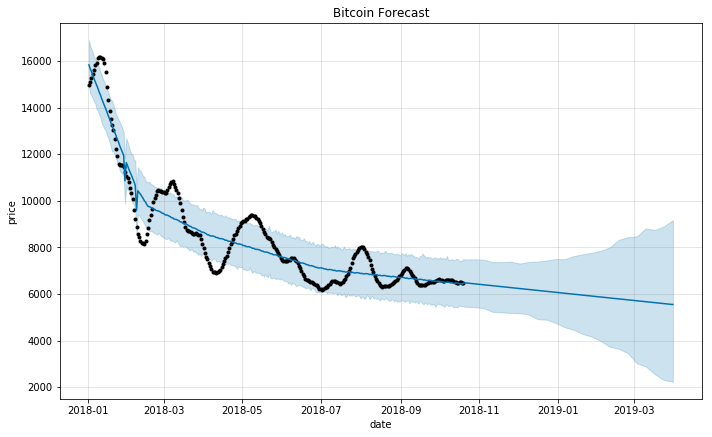

In [463]:
model.plot(forecast)
plt.title('Bitcoin Forecast')
plt.ylabel('price')
plt.xlabel('date');

In [ ]:
291	2018-10-19 12:38:00	6456.351634	5463.246658	7493.136280
292	2018-10-21 12:38:00	6473.041813	5446.126732	7478.723946